In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. covid19.csv를 데이터프레임으로 불러오기

In [9]:
cd /content/drive/MyDrive/Colab Notebooks/2021_2학기_데이터분석과머신러닝/Pandas_Matplotlib 실습

/content/drive/MyDrive/Colab Notebooks/2021_2학기_데이터분석과머신러닝/Pandas_Matplotlib 실습


In [10]:
df = pd.read_csv('covid19.csv')
df

,WHO,Country,Checked,Death,TravelRisk,Class
0,Africa,Algeria,27973,1163,0.041576,1
1,Africa,Angola,950,41,0.043158,1
2,Africa,Benin,1770,35,0.019774,2
3,Africa,Botswana,739,2,0.002706,2
4,Africa,Burkina Faso,1100,53,0.048182,1
...,...,...,...,...,...,...
181,Western Pacific,Philippines,82040,1945,0.023708,1
182,Western Pacific,Singapore,50838,27,0.000531,2
183,Western Pacific,South Korea,14203,300,0.021122,2
184,Western Pacific,Taiwan*,462,7,0.015152,2


### 2. TravelRisk를 기준으로 정렬하기

In [11]:
sort_df = df.sort_values(by=['TravelRisk'])
sort_df = sort_df.reset_index(drop=True)
sort_df

,WHO,Country,Checked,Death,TravelRisk,Class
0,Western Pacific,Vietnam,431,0,0.000000,2
1,Africa,Eritrea,265,0,0.000000,2
2,Western Pacific,Cambodia,226,0,0.000000,2
3,South-East Asia,Timor-Leste,24,0,0.000000,2
4,Western Pacific,Mongolia,289,0,0.000000,2
...,...,...,...,...,...,...
181,Europe,France,220352,30212,0.137108,1
182,Europe,Italy,246286,35112,0.142566,1
183,Europe,Belgium,66428,9822,0.147859,1
184,Europe,United Kingdom,301708,45844,0.151948,1


### 3. WHO별로 사망자 수 집계한 후, Bar그래프로 나타내기

In [14]:
temp_df = sort_df.groupby(['WHO'], as_index = False).sum()
temp_df

,WHO,Checked,Death,TravelRisk,Class
0,Africa,723207,12223,1.106727,78
1,Americas,8839286,342732,1.068259,48
2,Eastern Mediterranean,1469857,38023,0.768864,32
3,Europe,3299523,211144,2.351107,74
4,South-East Asia,1835297,41349,0.129580,18
5,Western Pacific,292428,8249,0.206456,29


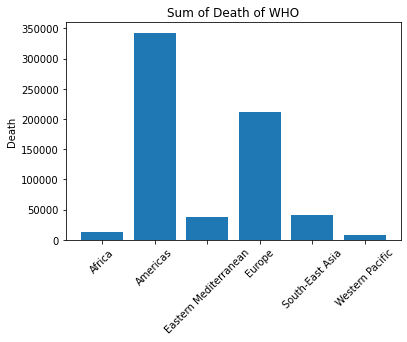

In [20]:
temp_df = sort_df.groupby(['WHO'], as_index=False).sum()
plt.bar(temp_df['WHO'], temp_df['Death'])
plt.xticks(rotation=45)
plt.title("Sum of Death of WHO")
plt.ylabel('Death')
plt.show()

### 4. 클래스별로 사망자 수를 나라별로 Plot으로 나타내라. 서브플랏을 이용할 것

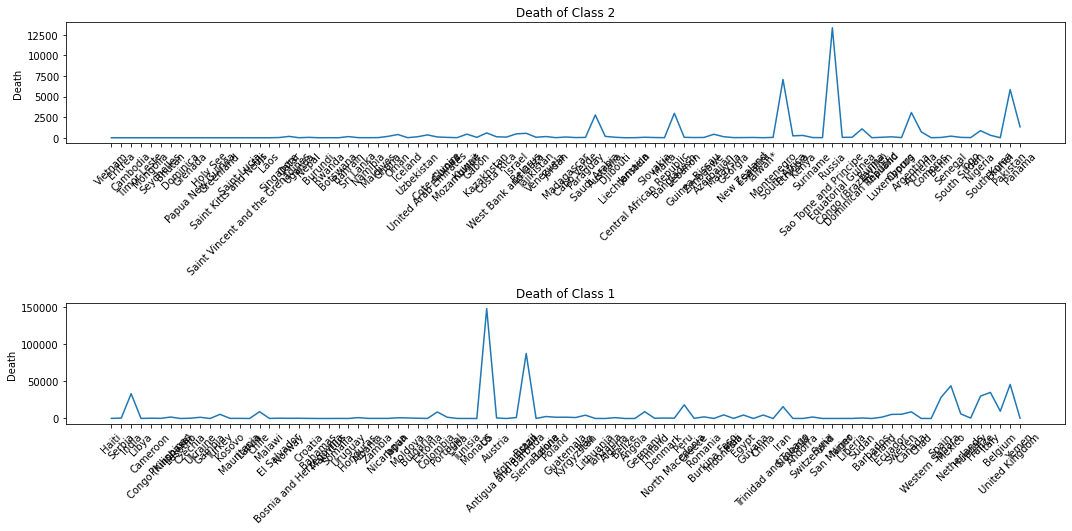

In [23]:
plt.rcParams['figure.figsize'] = (15,10)
for idx, tClass, in enumerate(sort_df['Class'].unique()):
    plt.subplot(3,1,idx+1)
    temp_df = sort_df[sort_df['Class'] == tClass]
    temp_df = temp_df.reset_index(drop=True)
    plt.plot(temp_df['Country'], temp_df['Death'])
    plt.xticks(rotation=45)
    plt.title("Death of Class {}".format(tClass))
    plt.ylabel('Death')
    pass
plt.tight_layout()
plt.show()

### 5. WHO별로 서브플랏을 나타낼것. 서브플롯 안에는 사망자 수를 나라별로 Plot으로 나타내라. 

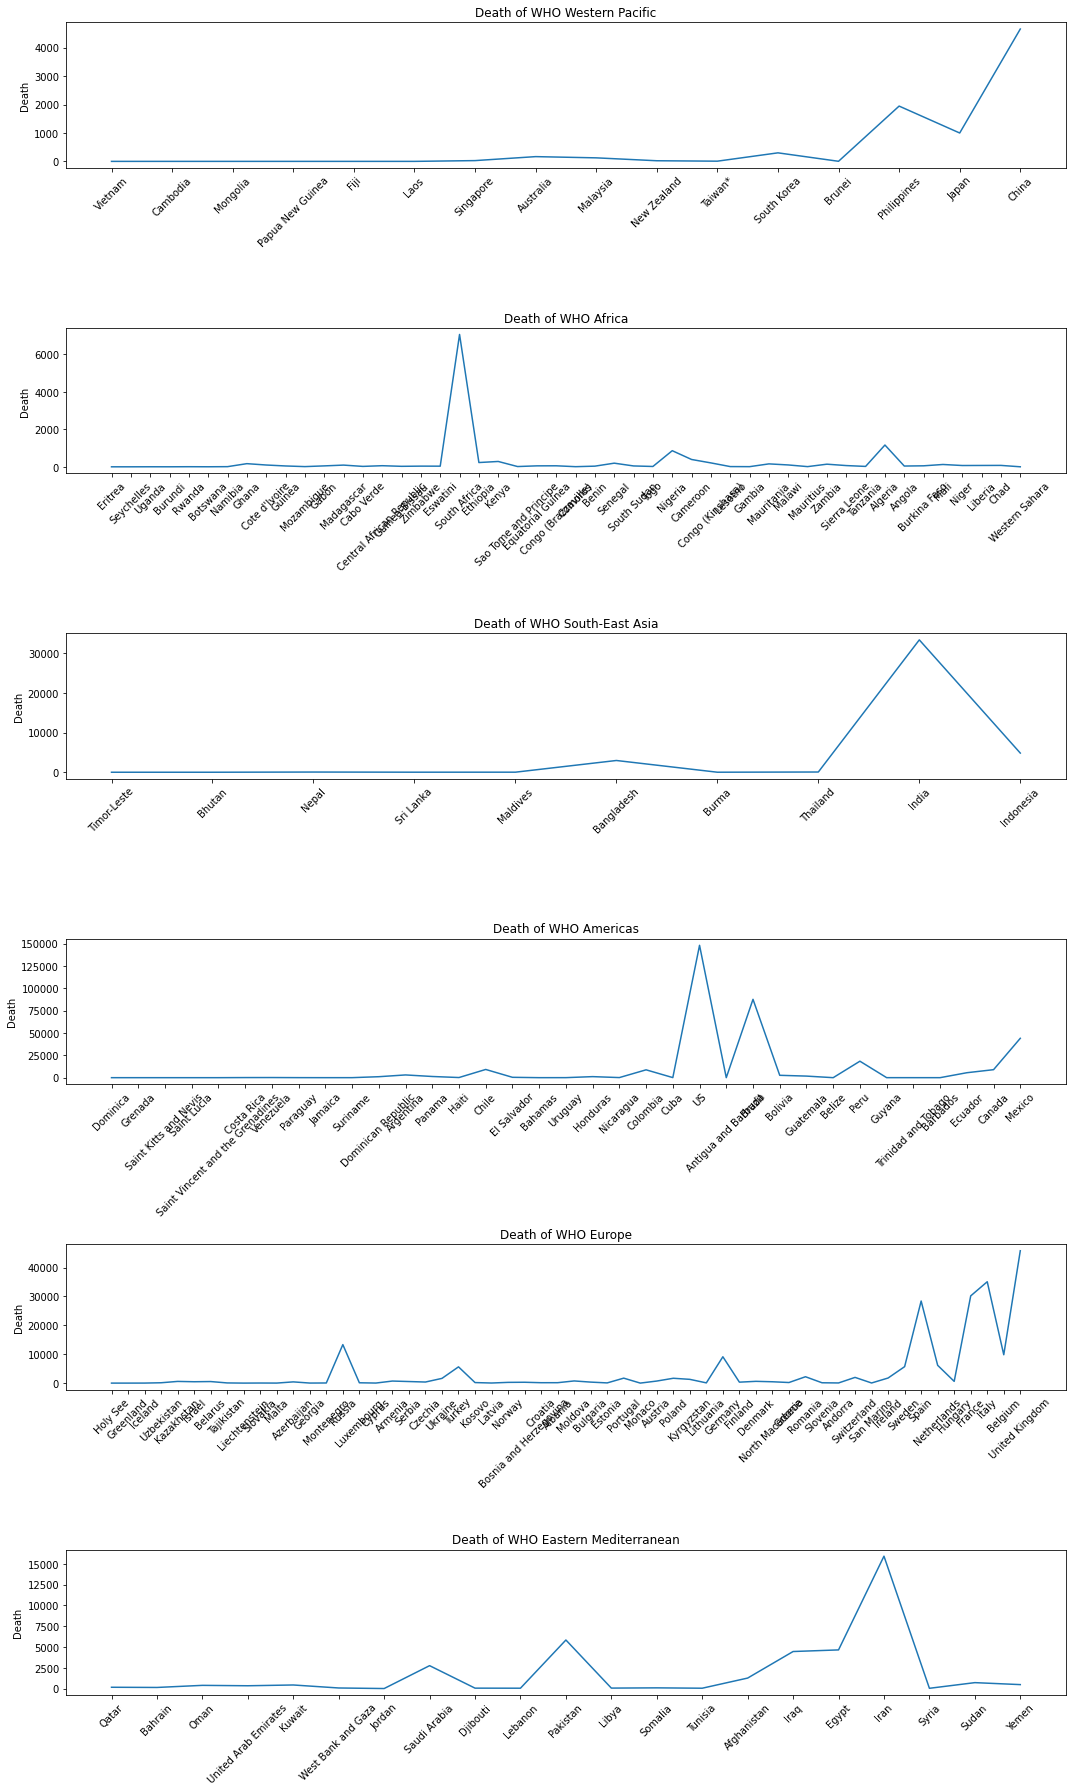

In [24]:
plt.rcParams['figure.figsize'] = (15,25)
for idx, who, in enumerate(sort_df['WHO'].unique()):
    plt.subplot(len(sort_df['WHO'].unique()),1,idx+1)
    temp_df = sort_df[sort_df['WHO'] == who]
    temp_df = temp_df.reset_index(drop=True)
    plt.plot(temp_df['Country'], temp_df['Death'])
    plt.xticks(rotation=45)
    plt.title("Death of WHO {}".format(who))
    plt.ylabel('Death')
    pass
plt.tight_layout()
plt.show()

### 6. WHO별로 사망자 수를 집계하고, WHO별 비율을 구하라. 그리고 이를 활용하여 PIE 차트로 나타내라.

In [25]:
total_death = sort_df.groupby('WHO').sum()['Death'].sum()
temp_df = pd.DataFrame(sort_df.groupby('WHO',as_index=False).sum()[['WHO','Death']])
temp_df['Death Ratio'] = (temp_df['Death'] / total_death)*100
temp_df

,WHO,Death,Death Ratio
0,Africa,12223,1.869761
1,Americas,342732,52.427951
2,Eastern Mediterranean,38023,5.816405
3,Europe,211144,32.298844
4,South-East Asia,41349,6.325185
5,Western Pacific,8249,1.261855


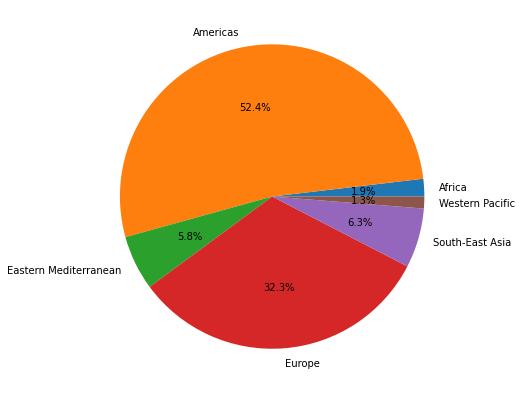

In [28]:
plt.rcParams['figure.figsize'] = (7,7) #뒤의 숫자 사진 크기 조절
plt.pie(temp_df['Death Ratio'], labels=temp_df['WHO'], autopct='%.1f%%')
plt.show()